In [1]:
"""
Bayesian Network for Supply Chain Risk Mitigation using PGMPY
---

🔍 **Situation**:
- Complex Bayesian Network to estimate supply chain risk using PGMPY.

📌 **Task**:
- Directed Acyclic Graph (DAG) where nodes represent variables, and edges represent causal or probabilistic dependencies.
- Uses Conditional Probability Tables (CPTs) to define relationships.
- Ideal for causal modeling, decision support, and prediction.
- Use case fit: ✅ Best for supply chain risk estimation because disruptions often follow a causal chain (e.g., raw material shortages → production delays → supplier failure).
- PGMPY also supports Markov Networks but follow undirect graphs that do not have causal relationship - not as good for supply chain risk estimation.

✨ **Action**: 
- We can make inferences about the probability of events in a supply chain given observed data. 

📈 **Result**:
- Extend the model to include more variables (e.g., transportation delays, natural disasters).
- More complex inferences (e.g., estimating the probability of multiple events occurring simultaneously).

✍ **Author**: Justin Wall
📅 **Updated**: 03/04/2025 
"""

'\nBayesian Network for Supply Chain Risk Mitigation using PGMPY\n---\n\n🔍 **Situation**:\n- Complex Bayesian Network to estimate supply chain risk using PGMPY.\n\n📌 **Task**:\n- Directed Acyclic Graph (DAG) where nodes represent variables, and edges represent causal or probabilistic dependencies.\n- Uses Conditional Probability Tables (CPTs) to define relationships.\n- Ideal for causal modeling, decision support, and prediction.\n- Use case fit: ✅ Best for supply chain risk estimation because disruptions often follow a causal chain (e.g., raw material shortages → production delays → supplier failure).\n- PGMPY also supports Markov Networks but follow undirect graphs that do not have causal relationship - not as good for supply chain risk estimation.\n\n✨ **Action**: \n- We can make inferences about the probability of events in a supply chain given observed data. \n\n📈 **Result**:\n- Extend the model to include more variables (e.g., transportation delays, natural disasters).\n- More co

In [2]:
# =============================================
# Create Fake Dataset for Supply Chain Risk
# =============================================
#%%
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 5000

# Generate synthetic supply chain data
data = pd.DataFrame({
    "Supplier_Delay": np.random.choice([0, 1], size=n_samples, p=[0.85, 0.15]),
    "Inventory_Level": np.random.choice(["High", "Medium", "Low"], size=n_samples, p=[0.5, 0.3, 0.2]),
    "Production_Delay": np.random.choice([0, 1], size=n_samples, p=[0.9, 0.1]),
    "Demand_Surge": np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2]),
    "Logistics_Delay": np.random.choice([0, 1], size=n_samples, p=[0.88, 0.12]),
    "Regulatory_Issues": np.random.choice([0, 1], size=n_samples, p=[0.92, 0.08]),
})

# Define the customer delay probability based on risk factors
def calculate_customer_delay(row):
    if row["Supplier_Delay"] == 1 or row["Production_Delay"] == 1 or row["Logistics_Delay"] == 1:
        return np.random.choice([0, 1], p=[0.4, 0.6])
    elif row["Inventory_Level"] == "Low" or row["Demand_Surge"] == 1 or row["Regulatory_Issues"] == 1:
        return np.random.choice([0, 1], p=[0.6, 0.4])
    else:
        return np.random.choice([0, 1], p=[0.9, 0.1])

# Apply function to create target variable
data["Customer_Delay"] = data.apply(calculate_customer_delay, axis=1)

# Encode categorical variable Inventory_Level
data["Inventory_Level"] = data["Inventory_Level"].map({"High": 0, "Medium": 1, "Low": 2})

# Display sample data
print(data.head())

# Supplier_Delay – Delay in receiving raw materials from suppliers.
# Inventory_Level – Stock availability (High, Medium, Low).
# Production_Delay – Manufacturing issues slowing down production.
# Demand_Surge – Sudden spike in demand (e.g., holiday season).
# Logistics_Delay – Issues in transportation and delivery.
# Regulatory_Issues – Delays due to compliance or customs.
# Customer_Delay – Whether the final product reaches the customer late.
#%%

   Supplier_Delay  Inventory_Level  Production_Delay  Demand_Surge  \
0               0                0                 0             0   
1               1                0                 0             0   
2               0                2                 0             0   
3               0                0                 0             0   
4               0                2                 0             0   

   Logistics_Delay  Regulatory_Issues  Customer_Delay  
0                0                  0               0  
1                0                  0               1  
2                0                  0               1  
3                0                  1               0  
4                0                  0               0  


In [3]:
# =============================================
# Define Bayesian Network Structure
# =============================================
#%%
# Define Bayesian Network Structure (DAG)
model = BayesianNetwork([
    ("Supplier_Delay", "Inventory_Level"),
    ("Inventory_Level", "Production_Delay"),
    ("Production_Delay", "Customer_Delay"),
    ("Demand_Surge", "Customer_Delay"),
    ("Logistics_Delay", "Customer_Delay"),
    ("Regulatory_Issues", "Customer_Delay")
])

# Display the structure
model.edges()
#%%

OutEdgeView([('Supplier_Delay', 'Inventory_Level'), ('Inventory_Level', 'Production_Delay'), ('Production_Delay', 'Customer_Delay'), ('Demand_Surge', 'Customer_Delay'), ('Logistics_Delay', 'Customer_Delay'), ('Regulatory_Issues', 'Customer_Delay')])

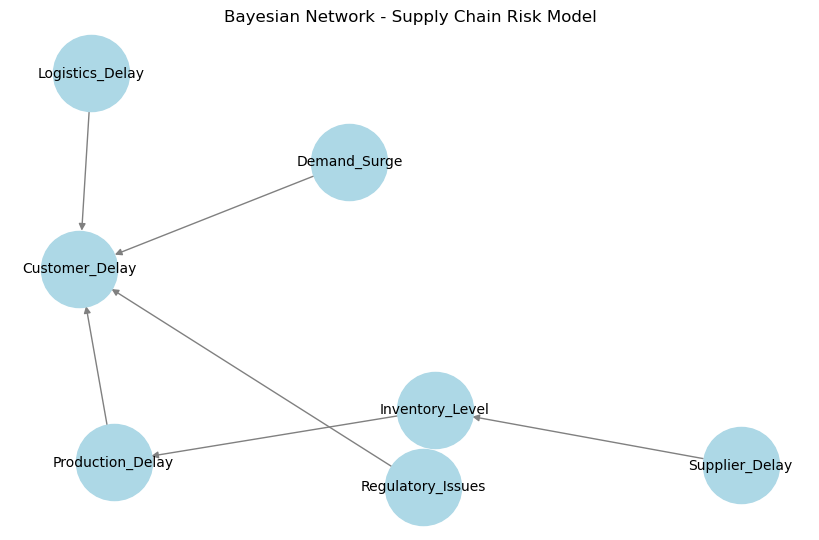

In [4]:
# =============================================
# Visualize the Bayesian Network
# =============================================
#%%
# Visualize the DAG
plt.figure(figsize=(8, 5))
G = nx.DiGraph()
G.add_edges_from(model.edges())
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, edge_color='gray')
plt.title("Bayesian Network - Supply Chain Risk Model")
plt.show()
#%%

In [5]:
# =============================================
# Run MLE Estimator to Fit the Model
# =============================================
#%%
# Estimate Conditional Probability Tables (CPTs) using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)
# Display learned CPDs (Conditional Probability Distributions)
for cpd in model.get_cpds():
    print(cpd)
#%%

+-------------------+-------+
| Supplier_Delay(0) | 0.854 |
+-------------------+-------+
| Supplier_Delay(1) | 0.146 |
+-------------------+-------+
+--------------------+---------------------+--------------------+
| Supplier_Delay     | Supplier_Delay(0)   | Supplier_Delay(1)  |
+--------------------+---------------------+--------------------+
| Inventory_Level(0) | 0.5201405152224824  | 0.4863013698630137 |
+--------------------+---------------------+--------------------+
| Inventory_Level(1) | 0.2901639344262295  | 0.3041095890410959 |
+--------------------+---------------------+--------------------+
| Inventory_Level(2) | 0.18969555035128804 | 0.2095890410958904 |
+--------------------+---------------------+--------------------+
+---------------------+-----+---------------------+
| Inventory_Level     | ... | Inventory_Level(2)  |
+---------------------+-----+---------------------+
| Production_Delay(0) | ... | 0.90134994807892    |
+---------------------+-----+-------------------

In [6]:
# =============================================
# Run Inferences
# =============================================
#%%
# Initialize inference object
inference = VariableElimination(model)

# Test inference questions (examples)
print("P(Customer Delay | Supplier Delay = 1):")
print(inference.query(variables=["Customer_Delay"], evidence={"Supplier_Delay": 1}))

print("P(Customer Delay | Production Delay = 1, Demand Surge = 1):")
print(inference.query(variables=["Customer_Delay"], evidence={"Production_Delay": 1, "Demand_Surge": 1}))

print("P(Production Delay | Low Inventory Level):")
print(inference.query(variables=["Production_Delay"], evidence={"Inventory_Level": 2}))  # Low Inventory Level = 2
#-----

#%%

P(Customer Delay | Supplier Delay = 1):
+-------------------+-----------------------+
| Customer_Delay    |   phi(Customer_Delay) |
+===================+=======================+
| Customer_Delay(0) |                0.6621 |
+-------------------+-----------------------+
| Customer_Delay(1) |                0.3379 |
+-------------------+-----------------------+
P(Customer Delay | Production Delay = 1, Demand Surge = 1):
+-------------------+-----------------------+
| Customer_Delay    |   phi(Customer_Delay) |
+===================+=======================+
| Customer_Delay(0) |                0.4548 |
+-------------------+-----------------------+
| Customer_Delay(1) |                0.5452 |
+-------------------+-----------------------+
P(Production Delay | Low Inventory Level):
+---------------------+-------------------------+
| Production_Delay    |   phi(Production_Delay) |
+=====================+=========================+
| Production_Delay(0) |                  0.9013 |
+------------